# Housing price prediction

#### ***About Data Set :***
The dataset consists of Price of Houses, from sales between May 2014 and May 2015. Along with house price it consists of information on **18 house features, date of sale and ID of sale.**

The dataset consists of information on **22,000 properties.**

#### ***Objective :***
Main objective is to build a **model that will predict the price of a house** based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

***Attribute information***
1. id - Unique id for each home sold
2. date - Date of the home saled
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft _ living - Square footage of the apartments interior living space
7. sqft _ lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - an index from 1 to 5 on the condition of the apartment
12. grade - An index from 1 to 13 , where 1-3falls short of building construction and design, 7 has an average level of construction and design , and 11-13 have a high quality level of construction and design
13. sqft _ above - the square footage of the interior housing space that is above ground level
14. sqft _ basement - the square footage of the inerior housing space that is below ground level
15. yr _ built - The year of the house was initially built
16. yr _ renovated - The year of the house's last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft _ living15 - The square footage of inerior housing living space for the nearest nearest 15 neighbours
21. sqft _ lot15 - the square footage of the land lots of the nearest 15 neighbours

In [1]:
# Importing necessary liabraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading a dataset
data1 = pd.read_excel("regression_data.xls")

In [3]:
data1.head(20)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


### Checking insights of data set

In [4]:
data1.shape

(21597, 21)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

 - There are total **21597 entries**
 - There are **no null** values
 - There are total **16 numeric integer, 4 numeric floating and 1 date time** variables
 - We can **drop id** column as it's unique and not contributing anything to predict the housing prices.

In [6]:
#Checking duplicats
data1.duplicated().sum()

0

 - There are **no duplocate** values

#### Checking unique values of each column

In [7]:
data1.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
data1['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

In [9]:
data1['bedrooms'].value_counts() # Number of bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
data1['bathrooms'].value_counts() # Number of bathrooms

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [11]:
data1['sqft_living'].value_counts() # Square footage of the apartments interior living space - carpet area

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [12]:
data1['sqft_lot'].value_counts() # Square footage of the land space - built up area

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64

In [13]:
data1['waterfront'].value_counts() # A dummy variable for whether the apartment was overlooking the waterfront or not

0    21434
1      163
Name: waterfront, dtype: int64

In [14]:
data1['view'].value_counts() # An index from 0 to 4 of how good the view of the property was

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [15]:
data1['condition'].value_counts() # an index from 1 to 5 on the condition of the apartment

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [16]:
data1['grade'].value_counts() # An index from 1 to 13 , where 1-3falls short of building construction and design, 
                              # 7 has an average level of construction and design , 
                              # and 11-13 have a high quality level of construction and design

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [17]:
data1['sqft_above'].value_counts() # the square footage of the interior housing space that is above ground level

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [18]:
data1['sqft_basement'].value_counts() # the square footage of the inerior housing space that is below ground level

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [19]:
data1['yr_built'].value_counts() # The year of the house was initially built

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [20]:
data1['yr_renovated'].value_counts() # The year of the house's last renovation

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
data1['zipcode'].value_counts() # What zipcode area the house is in

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
data1['lat'].value_counts() # Lattitude

47.5491    17
47.6846    17
47.5322    17
47.6624    17
47.6711    16
           ..
47.1976     1
47.3013     1
47.6139     1
47.4184     1
47.6502     1
Name: lat, Length: 5033, dtype: int64

In [23]:
data1['long'].value_counts() # Longitude

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.459      1
-121.726      1
-121.819      1
-122.440      1
-121.403      1
Name: long, Length: 751, dtype: int64

In [24]:
data1['sqft_living15'].value_counts() # The square footage of inerior housing living space for the nearest nearest 15 neighbours

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [25]:
data1['sqft_lot15'].value_counts() # the square footage of the land lots of the nearest 15 neighbours

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [26]:
# checking house with prices zero
(data1.price == 0).sum()

0

In [27]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [28]:
data1.nunique(axis = 0) 

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [29]:
data1['sqft_lot'] = data1['sqft_lot'].apply(lambda x: x*0.092903)
data1['sqft_living'] = data1['sqft_living'].apply(lambda x: x*0.092903)
data1['sqft_above'] = data1['sqft_above'].apply(lambda x: x*0.092903)
data1['sqft_basement'] = data1['sqft_basement'].apply(lambda x: x*0.092903)
data1['sqft_living15'] = data1['sqft_living15'].apply(lambda x: x*0.092903)
data1['sqft_lot15'] = data1['sqft_lot15'].apply(lambda x: x*0.092903)
data1

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,109.62554,524.901950,1.0,0,0,3,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,221900
1,6414100192,2014-12-09,3,2.25,238.76071,672.803526,2.0,0,0,3,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,538000
2,5631500400,2015-02-25,2,1.00,71.53531,929.030000,1.0,0,0,3,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,180000
3,2487200875,2014-12-09,4,3.00,182.08988,464.515000,1.0,0,0,5,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,604000
4,1954400510,2015-02-18,3,2.00,156.07704,750.656240,1.0,0,0,3,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,142.14159,105.073293,3.0,0,0,3,...,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627,360000
21593,6600060120,2015-02-23,4,2.50,214.60593,540.045139,2.0,0,0,3,...,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600,400000
21594,1523300141,2014-06-23,2,0.75,94.76106,125.419050,2.0,0,0,3,...,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321,402101
21595,291310100,2015-01-16,3,2.50,148.64480,221.852364,2.0,0,0,3,...,148.64480,0.00000,2004,0,98027,47.5345,-122.069,130.99323,119.566161,400000


In [30]:
data1['sqft_living15'].isnull().sum()

0

In [31]:
data1.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [32]:
df = data1.copy()

In [33]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,109.62554,524.901950,1.0,0,0,3,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,221900
1,6414100192,2014-12-09,3,2.25,238.76071,672.803526,2.0,0,0,3,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,538000
2,5631500400,2015-02-25,2,1.00,71.53531,929.030000,1.0,0,0,3,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,180000
3,2487200875,2014-12-09,4,3.00,182.08988,464.515000,1.0,0,0,5,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,604000
4,1954400510,2015-02-18,3,2.00,156.07704,750.656240,1.0,0,0,3,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,510000


In [34]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

##### Adding new column Age of housing
df['age'] = df['year'] - df['yr_built']

In [35]:
# Drop variables id & date
df = df.drop(['date','id'], axis = 1)

In [36]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,221900
1,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,538000
2,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,180000
3,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,604000
4,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,510000


In [37]:
df.shape

(21597, 19)

In [38]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,221900
1,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,538000
2,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,180000
3,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,604000
4,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,510000


In [39]:
# obtaining a statistical summary of the dataframe.
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,193.268141,1402.780372,1.494096,0.007547,0.234292,3.409825,7.657915,166.166012,27.102128,1970.999676,84.464787,98077.951845,47.560093,-122.213982,184.562987,1185.282813,5.402966e+05
std,0.926299,0.768984,85.294813,3847.358204,0.539683,0.086549,0.766390,0.650546,1.173200,76.901365,41.125167,29.375234,401.821438,53.513072,0.138552,0.140724,63.659967,2533.877481,3.673681e+05
min,1.000000,0.500000,34.374110,48.309560,1.000000,0.000000,0.000000,1.000000,3.000000,34.374110,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.068297,60.479853,7.800000e+04
25%,3.000000,1.750000,132.851290,468.231120,1.000000,0.000000,0.000000,3.000000,7.000000,110.554570,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,138.425470,473.805300,3.220000e+05
50%,3.000000,2.250000,177.444730,707.735054,1.500000,0.000000,0.000000,3.000000,7.000000,144.928680,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,170.941520,707.920860,4.500000e+05
75%,4.000000,2.500000,236.902650,992.668555,2.000000,0.000000,0.000000,4.000000,8.000000,205.315630,52.025680,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.251080,936.740949,6.450000e+05
max,33.000000,8.000000,1257.906620,153416.205177,3.500000,1.000000,4.000000,5.000000,13.000000,874.217230,447.792460,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.927630,80937.093600,7.700000e+06


In [40]:
(df < 0).sum()

bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long             21597
sqft_living15        0
sqft_lot15           0
price                0
dtype: int64

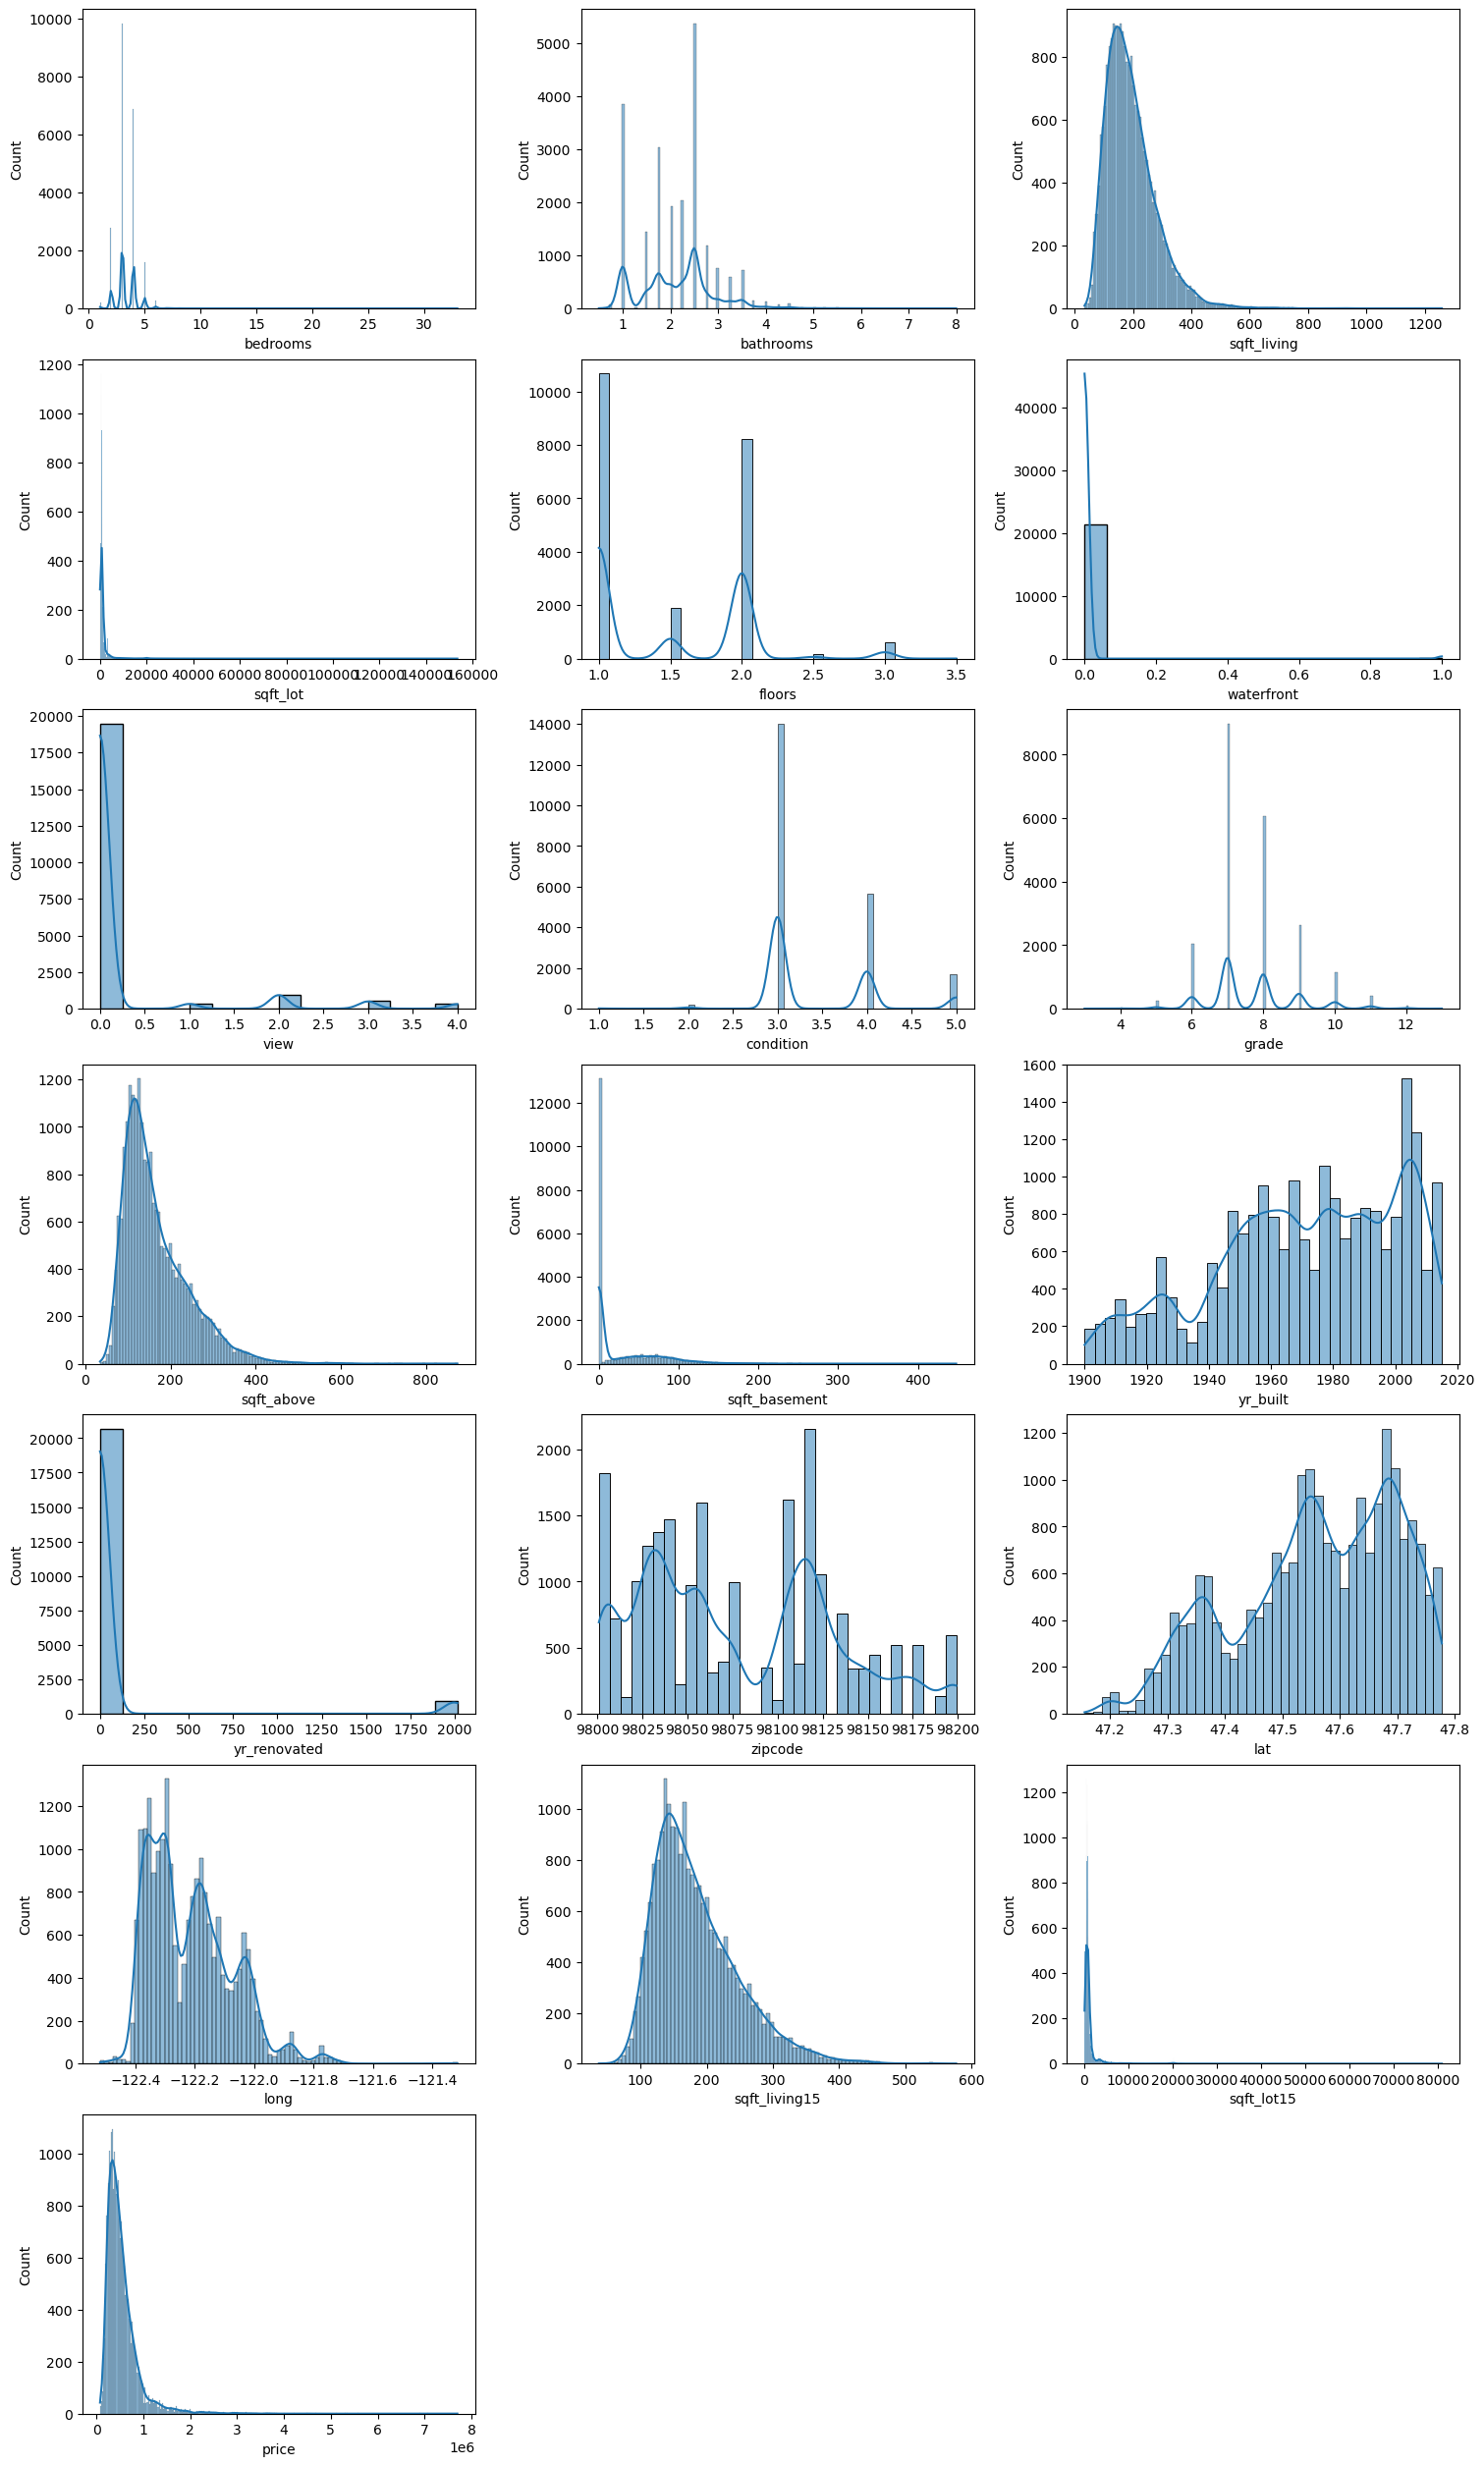

In [41]:
# Graph each variable's distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 25), constrained_layout=True)
for i in range(len(df.columns)):
    plt.subplot(7,3, i+1)
    sns.histplot(data=df, x=df[df.columns[i]], kde=True)

#### ***Key Points :***

 - The price of house mostly in range < 2000000
 - Most of house have 1 - 5 bedrooms
 - Most of house in King Country have more than 2 bathrooms
 - The sqft_living of house mostly in range 0 - 6000
 - The sqft_lot of house mostly in range < 250000
 - Most of house have 1 - 2 floors
 - Most of house not have a waterfront
 - Most of house have zero score of view
 - Most of houses are in a good condition
 - Most of house have a grade on 5 - 12
 - Like sqft_living, most of house have sqft_above in range 0 - 6000
 - Most of house not have a sqft_basement
 - Based on yr_built, the peak of house construction is on 1940 - 2020
 - Based on yr_renovated, Most of house doesn't get renovated
 - The zipcode of house is on number 98000 - 98200
 - The sqft_living15 of house mostly in range 1000 - 5000
 - The sqft_lot15 of house mostly in range < 200000

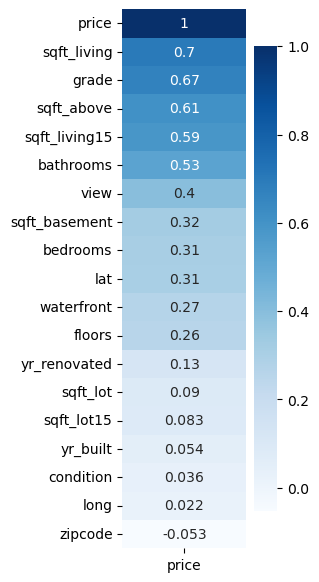

In [42]:
# Correlationg features with target

# The target of this dataset is price, so we will correlated this target to all features

plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False),  annot=True, cmap='Blues')

 - As we can see, price variable has a strong correlation with **sqft_living, grade, sqft_above, sqft_living15, and bathrooms**

In [43]:
a = df.corr()

In [44]:
a

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368


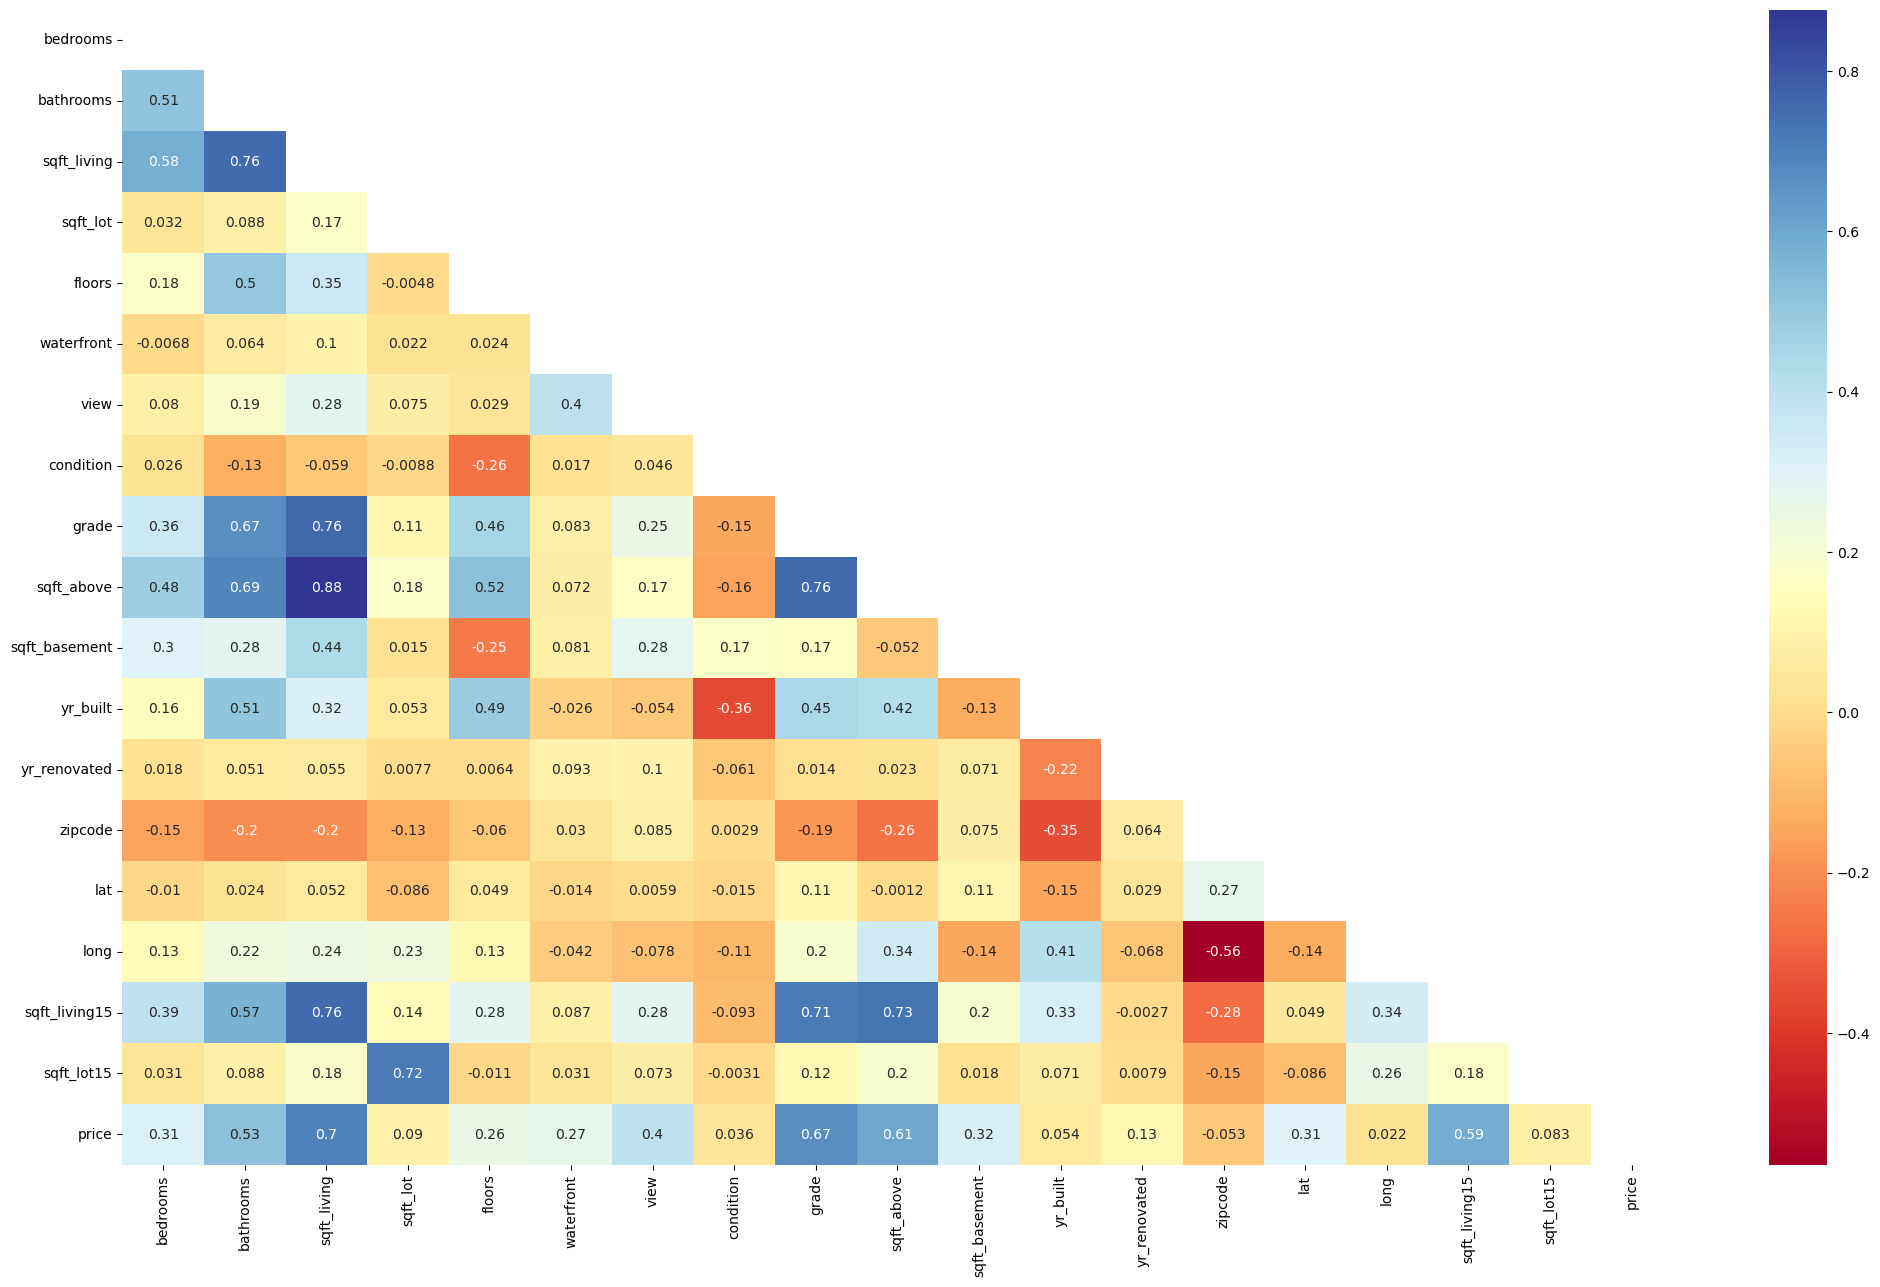

In [45]:
# visual view of correlation on nemerical columns
plt.figure(figsize=(25,15))
mask = np.zeros_like(a, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

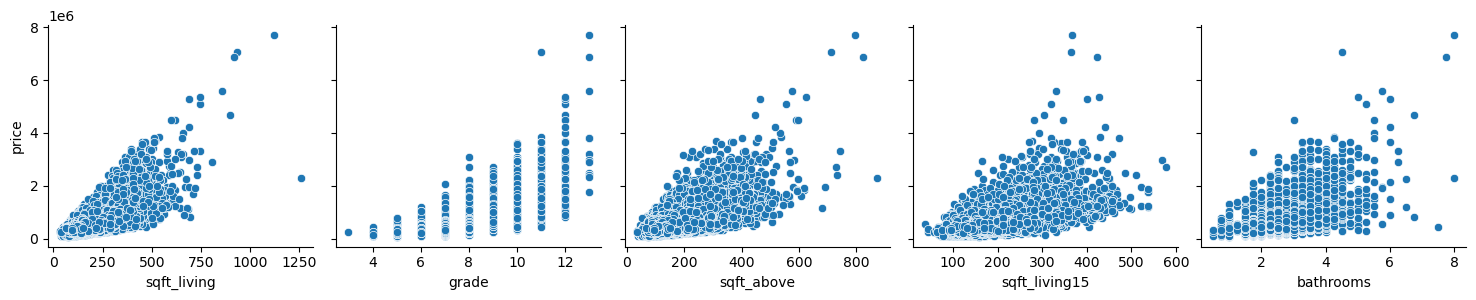

In [46]:
# Pairplot variable target with strong correlation variables target -with
sns.pairplot(df, x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], y_vars=['price'], height=3, aspect=1)

**Based on the pairplot above, we can see that :**

 - more large sqft_living, the house is more pricey
 - more high grade, the house is more pricey
 - more large sqft_above, the house is more pricey
 - more large sqft_living15, the house is more pricey

### Graph each small amount variable with response

In [47]:
# Describe the small amount variable
sav = df[(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'])]

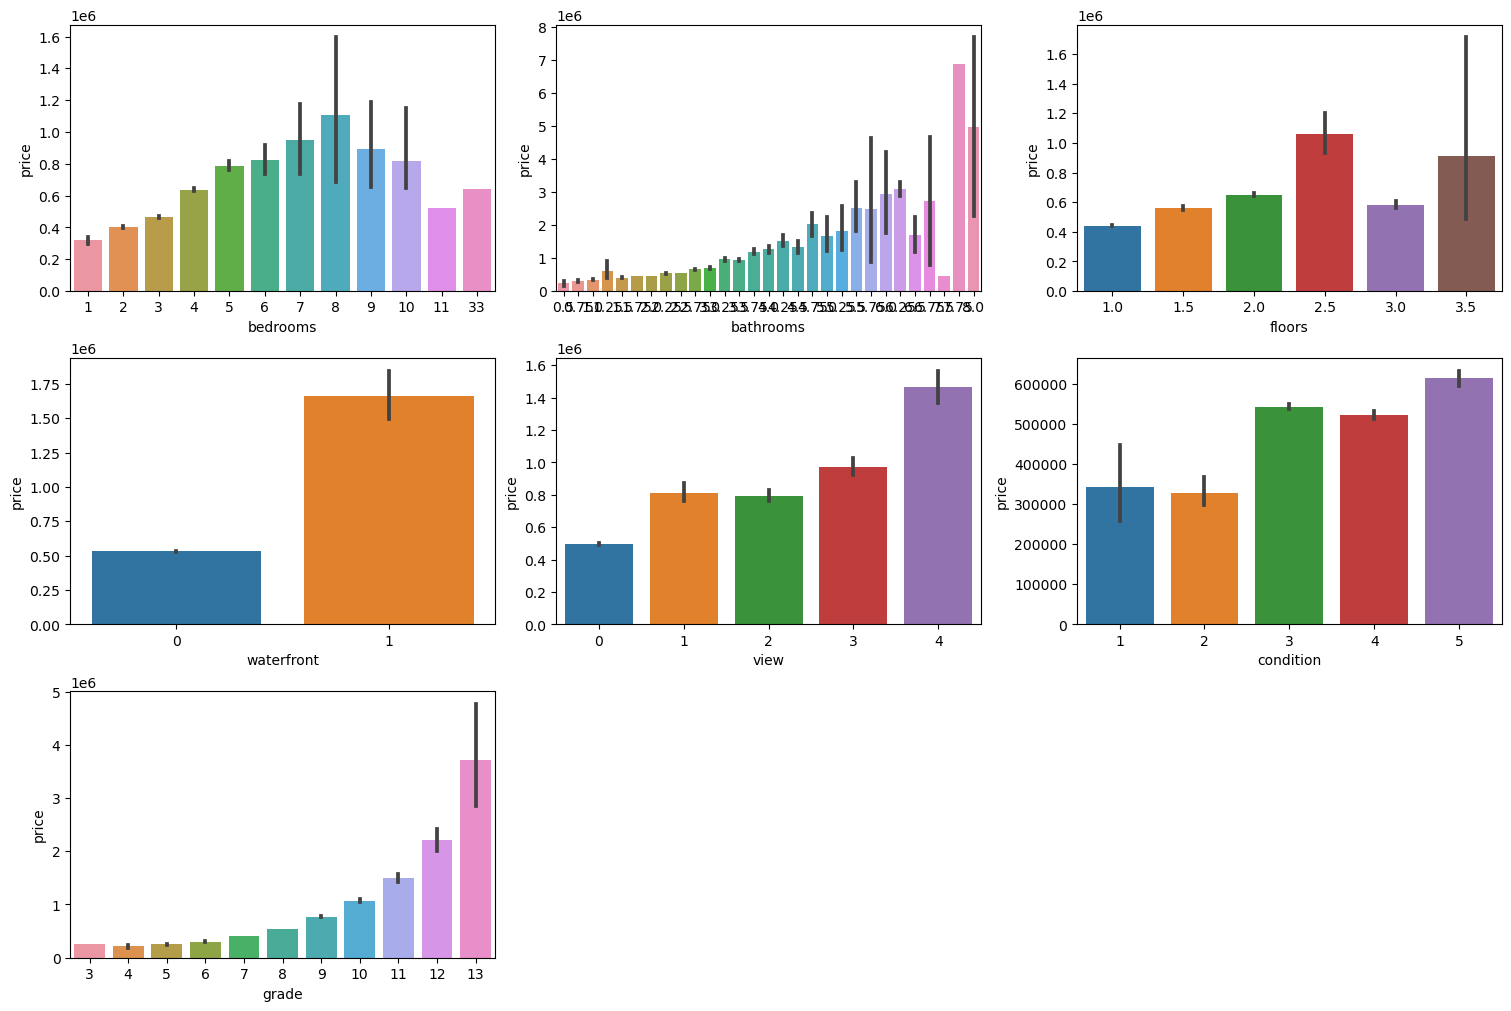

In [48]:
# Graph each small amount variable with response
fig = plt.figure(figsize=(15,10), constrained_layout=True)
for i in range(len(sav.columns)):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=sav, x=sav[sav.columns[i]], y=df['price'])

**Key Points :**

 - The more bathrooms house had, the more pricey that house
 - The more floors house had, the more pricey that house
 - waterfront makes the house more pricey
 - The more view house had, the more pricey that house
 - The more good condition house had, the more pricey that house
 - The more grade house had, the more pricey that house

<Axes: >

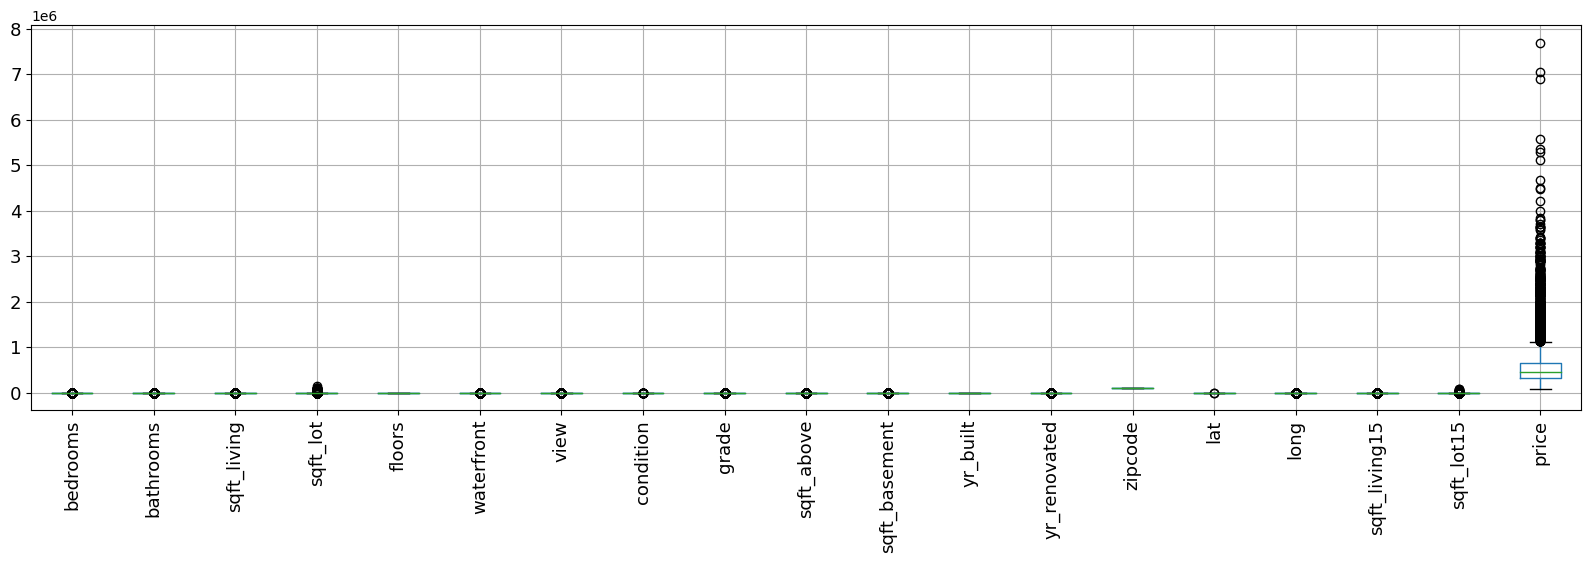

In [49]:
# Outlier detection
plt.figure(figsize=(20,5))
df.boxplot(grid=True, rot=90, fontsize=13)

As we can see, that there is an **outlier** on three variables **price, sqft_lot & sqft_lot1**. But most of the outliers are near each other so we assume that this value of outliers is true (contains a good information) and we will keep all the data.

### Scaling the numerical columns

In [50]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [51]:
# dropping 'zipcode', 'lat' and 'long' columns as they are not highly correlated with our taget

df = df.drop(['zipcode', 'lat', 'long'], axis = 1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  float64
 3   sqft_lot       21597 non-null  float64
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  sqft_living15  21597 non-null  float64
 14  sqft_lot15     21597 non-null  float64
 15  price          21597 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 2.6 MB


In [53]:
df.head(100)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,124.49002,524.901950,221900
1,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,157.00607,709.686017,538000
2,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,252.69616,748.983986,180000
3,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,126.34808,464.515000,604000
4,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,167.22540,697.051209,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,2.50,306.57990,952.255750,1.0,0,0,3,7,222.03817,84.54173,1946,1991,181.16085,561.598635,905000
96,3,1.75,182.08988,1456.811943,1.0,0,0,3,7,182.08988,0.00000,1967,0,162.58025,1450.773248,247500
97,4,1.50,107.76748,594.579200,1.0,0,0,4,7,107.76748,0.00000,1975,0,107.76748,594.579200,199000
98,3,1.75,168.15443,3883.345400,1.0,0,0,5,7,112.41263,55.74180,1980,0,153.28995,12545.249508,314000


### Checking skewness before transformation

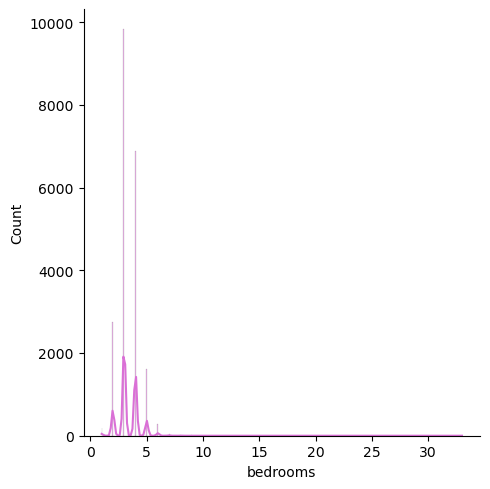

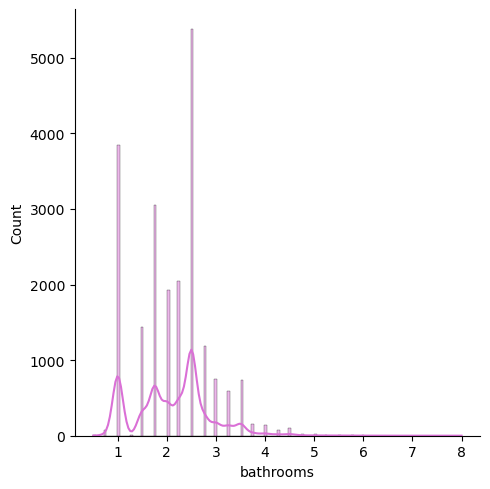

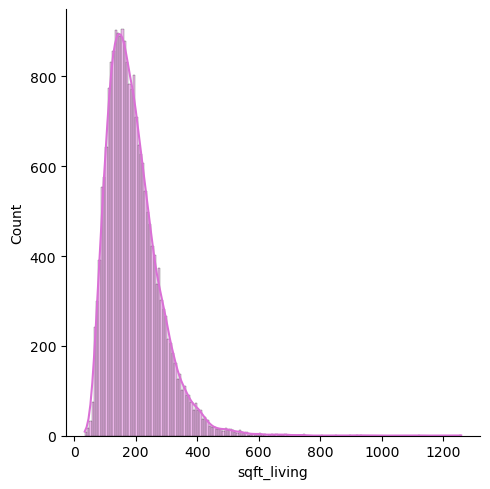

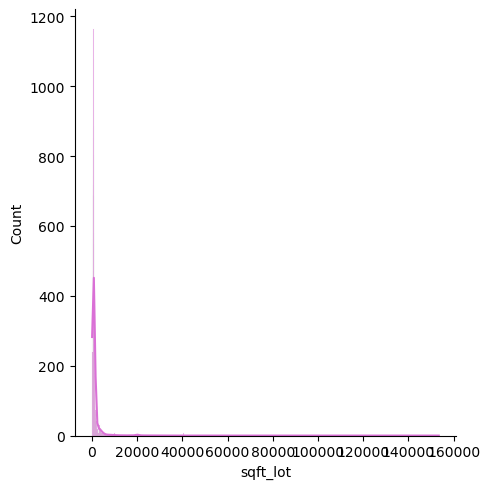

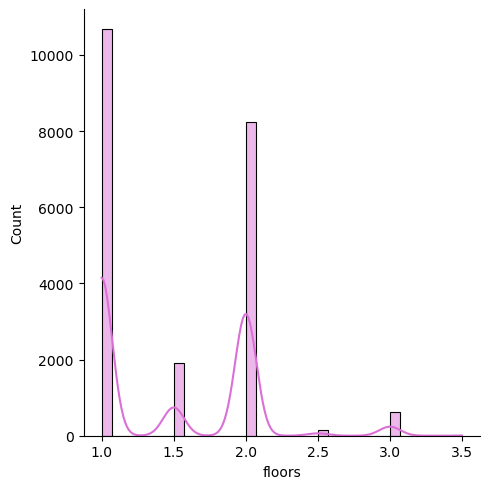

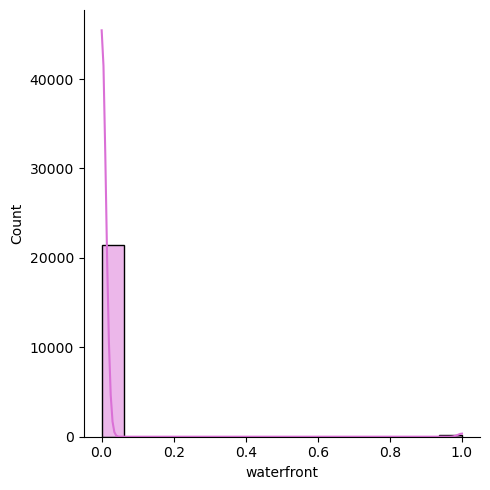

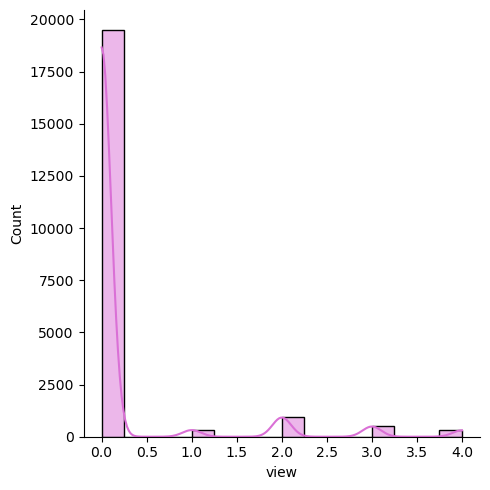

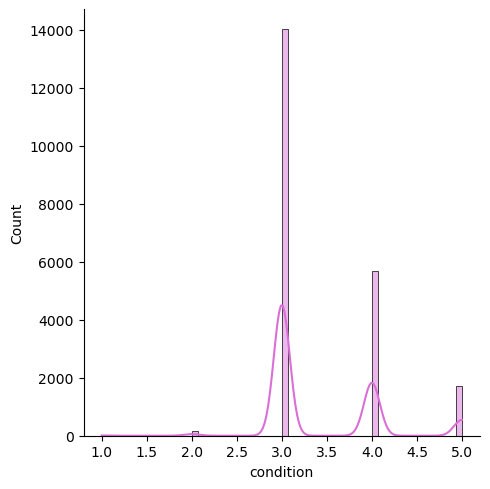

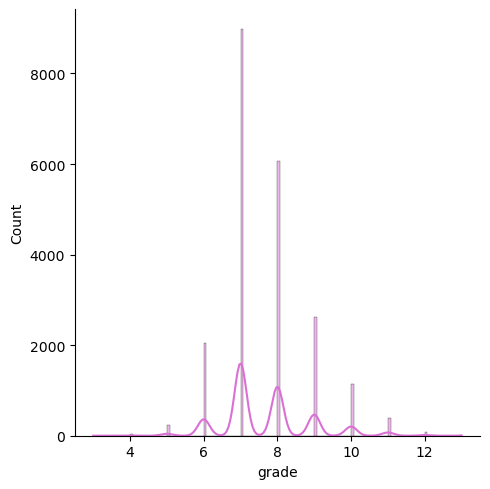

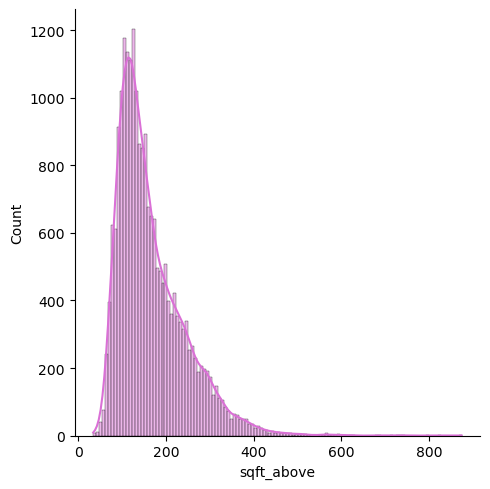

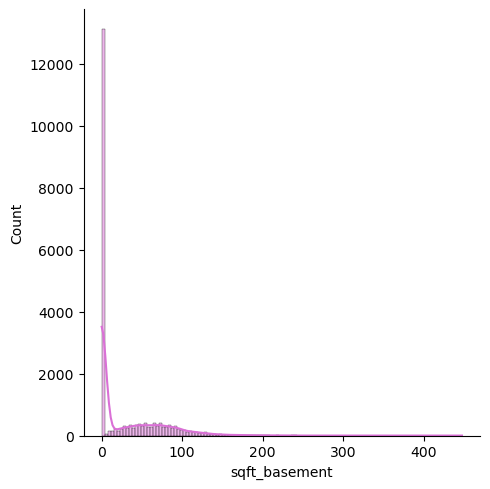

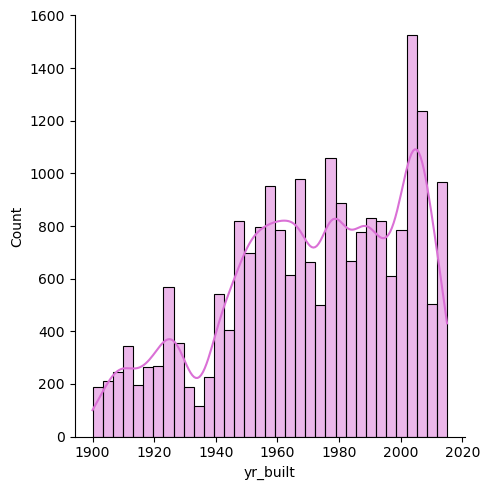

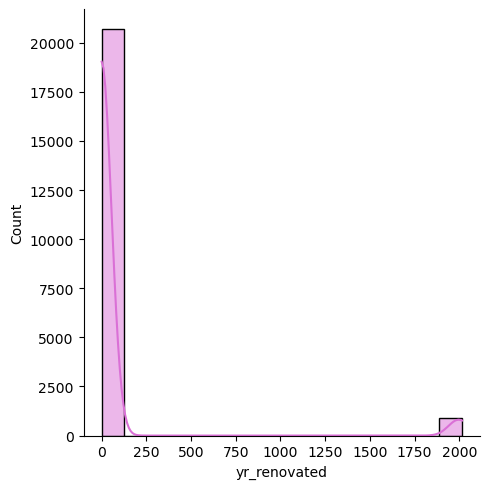

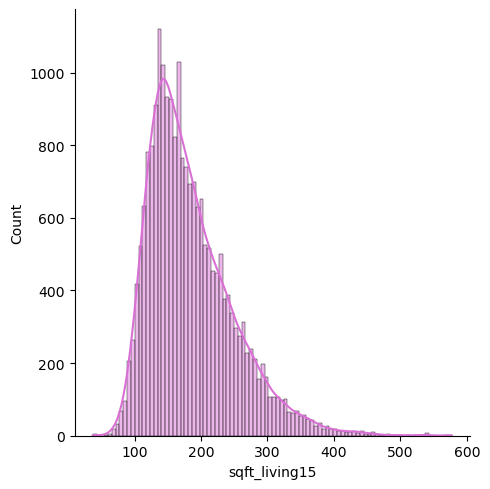

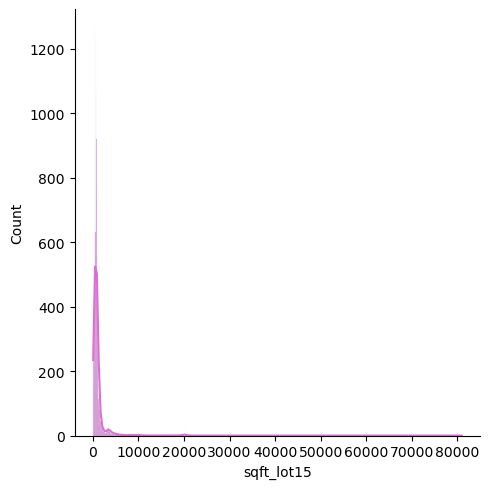

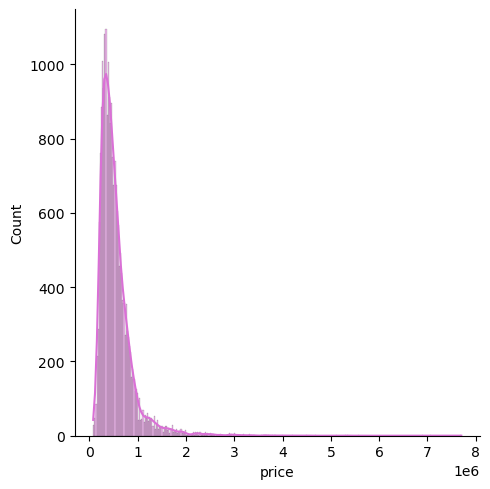

In [54]:
for column in df.columns:
    sns.displot(df[column], kde = True, color='orchid')  # takes to see the distribution
    plt.show()

#### ***box-cox transformation***

In [ ]:
(df < 0).sum()

In [ ]:
df['bathrooms'].values

In [ ]:
#function to apply box cox tranformation

import scipy.stats as stats
from scipy.stats import boxcox 

df_box_cox = df.copy()

def boxcox_transform(df_box_cox):
    numeric_cols = df_box_cox.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since any columns should take negative numbers, to avoid -inf in data
        df_box_cox[column] = np.where(df_box_cox[column]<=0, np.NAN, df_box_cox[column]) 
        df_box_cox[column] = df_box_cox[column].fillna(df_box_cox[column].mean())
        transformed_data, ci = stats.boxcox(df_box_cox[column])
        df_box_cox[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

# applying a boxcox tranformation on data
df_box_cox, _ci = boxcox_transform(df_box_cox)
df.head()

#### ***log_transformation***

In [ ]:
# Applaying log transformation on data

df_log_trans = np.log(df.replace(0, np.nan))

In [ ]:
df_log_trans.head()

In [ ]:
# Replacing nan values back to 0

df_log_trans = df_log_trans.replace(np.nan,0)

In [ ]:
df_log_trans.head()

In [ ]:
# Checking skewness after transformation

for column in df_log_trans.columns:
    sns.displot(df_log_trans[column], kde = True, color='tomato')  # takes to see the distribution
    plt.show()

## Modeling

In [55]:
# Defining x and y variables
X = df.drop('price',axis = 1)
y = df['price']

In [56]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,124.49002,524.901950
1,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,157.00607,709.686017
2,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,252.69616,748.983986
3,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,126.34808,464.515000
4,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,167.22540,697.051209


In [57]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

### Scaling with log_transformation

### Train-test Split

In [60]:
# spliting the trainng and testing data using sklearn train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=42)

In [61]:
# checking  training data 
X_train.shape

(15117, 15)

In [62]:
# checking testing data set
y_train.shape

(15117,)

In [63]:
# checking x_test data set
X_test.shape

(6480, 15)

In [64]:
# checking y_test data set
y_test.shape

(6480,)

### Scaling with standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
xtest_std = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [70]:
xtrain_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-1.513514,0.493442,0.317532,-0.208692,-0.917609,-0.088318,-0.303739,-0.628778,0.289492,0.706352,-0.660337,1.326208,-0.208357,-0.174780,-0.230645
1,0.686360,2.116382,1.195473,0.049111,0.931061,11.322770,4.902181,-0.628778,1.995963,1.681912,-0.660337,0.951276,-0.208357,0.436651,0.023658
2,-0.413577,0.493442,-0.386988,-0.200655,0.931061,-0.088318,-0.303739,-0.628778,0.289492,-0.076505,-0.660337,0.780853,-0.208357,-0.305801,-0.218475
3,0.686360,-0.155734,-0.235246,-0.156332,-0.917609,-0.088318,2.299221,-0.628778,-0.563744,0.092110,-0.660337,0.201413,-0.208357,-0.320359,-0.171384
4,5.086109,1.142618,0.826955,-0.059796,-0.917609,-0.088318,-0.303739,-0.628778,-0.563744,1.272418,-0.660337,-0.412112,-0.208357,-0.742538,-0.291787


In [71]:
xtest_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.413577,-1.778674,-1.340801,-0.160643,-0.917609,-0.088318,-0.303739,-0.628778,-1.416980,-1.437472,-0.097906,-0.889298,-0.208357,-1.659685,-0.164930
1,-0.413577,-1.454086,-0.625442,-0.221282,-0.917609,-0.088318,-0.303739,0.907795,-1.416980,-1.124329,0.801984,-1.059722,-0.208357,-0.698864,-0.263391
2,0.686360,0.168854,-0.321956,0.653412,-0.917609,-0.088318,-0.303739,-0.628778,-0.563744,-0.750966,0.734492,0.405921,-0.208357,0.101820,1.373278
3,-1.513514,-0.804910,-1.026476,-0.308540,-0.917609,-0.088318,0.997741,-0.628778,-0.563744,-1.401340,0.487022,0.576344,-0.208357,-0.713422,-0.289648
4,-0.413577,-1.454086,-0.636280,-0.273958,-0.917609,-0.088318,-0.303739,-0.628778,-0.563744,-0.955714,0.464525,-0.821129,-0.208357,-0.509611,-0.325898


In [72]:
xtrain_std.shape

(15117, 15)

### Building Neural Network with Keras with standard scalar

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [75]:
# Creating a sequential network
nn = Sequential()

# Hidden Layer 1 along with inputs
nn.add(Dense(128,input_dim=xtrain_std.shape[1],activation='relu'))
# Dropout Layer 1
nn.add(Dropout(0.5))

# Hidden Layer 2
nn.add(Dense(64, activation='relu'))
# Dropout Layer 2
nn.add(Dropout(0.5))

# Hidden Layer 3
nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.5))

# Output Layer (For regession use linear activaion function)
nn.add(Dense(1,activation='linear'))

In [76]:
# Checking summary of the layers added
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [77]:
# Defining a loss function for compilation
nn.compile(loss='mse', optimizer='adam')

In [78]:
# Model fitting
hist = nn.fit(xtrain_std,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
378/378 [==============================] - 5s 4ms/step - loss: 407876599808.0000 - val_loss: 289773027328.0000
Epoch 2/100
378/378 [==============================] - 1s 3ms/step - loss: 148279246848.0000 - val_loss: 77895417856.0000
Epoch 3/100
378/378 [==============================] - 1s 3ms/step - loss: 91425677312.0000 - val_loss: 66627518464.0000
Epoch 4/100
378/378 [==============================] - 1s 3ms/step - loss: 84588101632.0000 - val_loss: 59060592640.0000
Epoch 5/100
378/378 [==============================] - 1s 3ms/step - loss: 77882449920.0000 - val_loss: 54063628288.0000
Epoch 6/100
378/378 [==============================] - 2s 5ms/step - loss: 74159742976.0000 - val_loss: 50508062720.0000
Epoch 7/100
378/378 [==============================] - 1s 4ms/step - loss: 74477297664.0000 - val_loss: 47873286144.0000
Epoch 8/100
378/378 [==============================] - 1s 4ms/step - loss: 71323516928.0000 - val_loss: 46344790016.0000
Epoch 9/100
378/378 [========

### Visualisation of Model Training

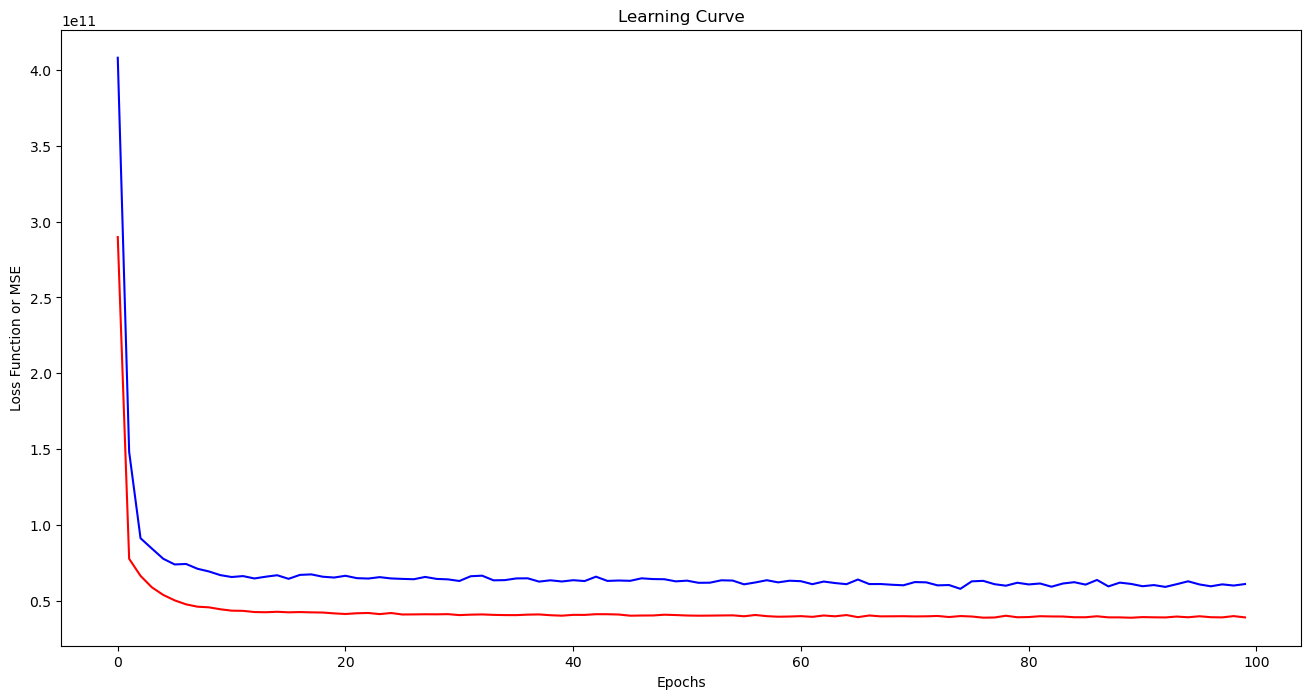

In [79]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],c='blue')
plt.plot(hist.history['val_loss'],c='red')
plt.xlabel('Epochs')
plt.ylabel('Loss Function or MSE')
plt.title('Learning Curve')
plt.show()

### Creating Predictions

In [80]:
tr_pred = nn.predict(xtrain_std)
ts_pred = nn.predict(xtest_std)

203/203 [==============================] - 0s 2ms/step


In [81]:
# printing first 5 training data predictions
tr_pred[0:5]

array([[ 450445.8 ],
       [1636399.4 ],
       [ 391173.5 ],
       [ 313495.06],
       [ 466766.2 ]], dtype=float32)

In [82]:
# printing first 5 testing data predictions
ts_pred[0:5]

array([[232910.58],
       [317975.3 ],
       [298704.12],
       [307540.8 ],
       [384678.94]], dtype=float32)

### Evaluating Model with Train and Test Data

In [83]:
# Loss function use nn.evaluate
nn.evaluate(xtrain_std, y_train)

473/473 [==============================] - 1s 2ms/step - loss: 38058618880.0000


38058618880.0

In [84]:
# Loss function or mse for test 
nn.evaluate(xtest_std, y_test)

203/203 [==============================] - 1s 2ms/step - loss: 40725831680.0000


40725831680.0

In [85]:
tr_pred= nn.predict(xtrain_std)
ts_pred= nn.predict(xtest_std)

203/203 [==============================] - 0s 2ms/step


In [86]:
# rmse, mae, r2 score use sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
tr_mae = mean_absolute_error(y_train, tr_pred)
tr_mse = mean_squared_error(y_train,tr_pred)
tr_r2 = r2_score(y_train,tr_pred)
print('Training MAE :',round(tr_mae,2))
print('Training MSE :',round(tr_mse,2))
print('Training RMSE :',round(tr_mse**0.5,2))
print('Training R2 :',round(tr_r2,4))

Training MAE : 125233.08
Training MSE : 38058638615.88
Training RMSE : 195086.23
Training R2 : 0.7201


In [87]:
# Testing or unseen data evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ts_mae = mean_absolute_error(y_test, ts_pred)
ts_mse = mean_squared_error(y_test,ts_pred)
ts_r2 = r2_score(y_test,ts_pred)
print('Testing MAE :',round(ts_mae,2))
print('Testing MSE :',round(ts_mse,2))
print('Testing RMSE :',round(ts_mse**0.5,2))
print('Testing R2 :',round(ts_r2,4))

Testing MAE : 127653.74
Testing MSE : 40725822800.69
Testing RMSE : 201806.4
Testing R2 : 0.6929


### Building sklearn linear regression model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [89]:
# fitting the model into linear-regression model 
lr_m= LinearRegression()
lr_m.fit(X_train,y_train)
print("Done")

Done


In [90]:
# predicting the value
predictions= lr_m.predict(X_test)
predictions

array([120572.28577454, 301380.09220982, 300640.02377847, ...,
       318875.07627963, 559241.71937075, 270833.08469678])

In [91]:
# checking different accuracy scores
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.6312604420040482
RMSE =  221120.55471031982
The value of the metric MSE is  48894299715.39954
MAE =  140983.17159063494


In [92]:
# calculating adjusted r-squared value
adj_r2 = 1 - (1-lr_m.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adj_r2)

0.653689419071426


#### Create dataframe for visualising the differences between real and predicted values

In [93]:
results = pd.DataFrame()
results = pd.DataFrame()
results['Actual'] = y_test
results['predicted'] = predictions
results['difference'] = results.apply(lambda x: abs(x['Actual'] - x['predicted']), axis=1)
results.head(10)

,Actual,predicted,difference
3686,132500,1.205723e+05,11927.714225
10247,415000,3.013801e+05,113619.907790
4037,494000,3.006400e+05,193359.976222
3437,355000,2.785449e+05,76455.109454
19291,606000,3.785761e+05,227423.879509
13858,640000,4.336301e+05,206369.914268
3503,256500,1.254024e+05,131097.616701
19247,959000,1.132811e+06,173811.272046
6433,445000,4.846899e+05,39689.884517
5843,254000,3.469507e+05,92950.659506


In [94]:
results.sort_values('difference', ascending=False).head(20)

,Actual,predicted,difference
9245,6890000,2.665485e+06,4.224515e+06
3910,7060000,3.094098e+06,3.965902e+06
8629,4490000,1.674515e+06,2.815485e+06
1162,5110000,2.777219e+06,2.332781e+06
2624,4500000,2.525480e+06,1.974520e+06
20279,3200000,1.467519e+06,1.732481e+06
21514,3000000,1.311302e+06,1.688698e+06
2897,3000000,1.551754e+06,1.448246e+06
15856,640000,-7.663736e+05,1.406374e+06
18288,3300000,1.922688e+06,1.377312e+06


<Axes: xlabel='Actual', ylabel='predicted'>

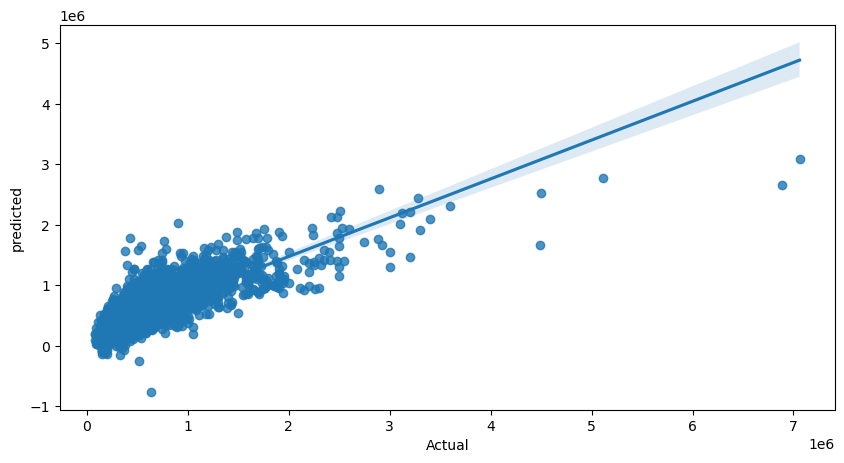

In [95]:
# Representing the result
plt.figure(figsize=(10,5))
sns.regplot(x = results['Actual'], y = results['predicted'])

### Applaying log transformation on data